# Replication of Fig. 5 in "Tesco Grocey 1.0, a large-scale dataset of grocery purchases in London"

In [15]:
#%matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # needed for heatmap
from os.path import join
plt.rcParams['figure.figsize'] = [7, 5]

In [16]:
# define paths for data
FOLDER_PATH = 'data'
VALIDATION_PATH = 'validation_data'
PURCHASES_PATH = 'area_level_purchases'
OSWARD_GROCERY = 'year_osward_grocery.csv'
MSOA_GROCERY = 'year_msoa_grocery.csv'
LSOA_GROCERY = 'year_lsoa_grocery.csv'

ward_data_path = join(FOLDER_PATH, PURCHASES_PATH, OSWARD_GROCERY)
msoa_data_path = join(FOLDER_PATH, PURCHASES_PATH, MSOA_GROCERY)
lsoa_data_path = join(FOLDER_PATH, PURCHASES_PATH, LSOA_GROCERY)

In [17]:
# load the data sets
df_ward = pd.read_csv(ward_data_path, sep=',', index_col=0)
df_msoa = pd.read_csv(msoa_data_path, sep=',', index_col=0)
df_lsoa = pd.read_csv(lsoa_data_path, sep=',', index_col=0)
dfs = [df_ward, df_msoa, df_lsoa]
granul = ['ward', 'msoa', 'lsoa']

# Reproducing Figure 4

## Battle Plan

In the paper, the authors plot the ratio of representative areas above a threshold `threshold_r` for different spatial granularities. The data set already provides the normalized representativeneness `representativeness^norm`.

For every spatial granularity (`lsoa`, `msoa`, `ward`) do:
1. get range of thresholds \[0, 1\]
2. for every threshold value calculate ratio `representativeness^norm` > `ratio`

In [18]:
markers = ['o', '^', 'v']

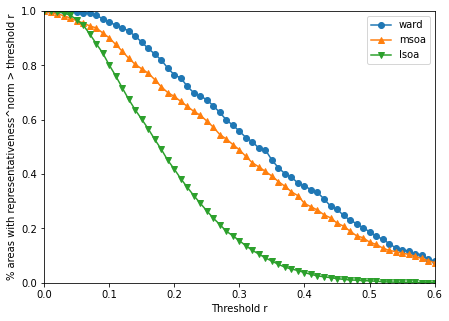

In [20]:
# getting thresholds
thresholds = np.linspace(0, 1, num=101)
for idx, df in enumerate(dfs):
    ratios = []
    # calculating the ratios
    for threshold in thresholds:
        ratios.append(df.loc[df['representativeness_norm'] > threshold].shape[0] / df.shape[0])
    plt.plot(thresholds, ratios, label=granul[idx], marker=markers[idx])
# formatting the plot
plt.legend()
plt.xlabel('Threshold r')
plt.ylabel('% areas with representativeness^norm > threshold r')
plt.xlim([0, 0.6])
plt.ylim([0, 1])
plt.show()

<img style="float: left;" src="https://i.imgur.com/R6amUlE.png" width=500>

# Comments

Blablabla

In [12]:
df_ward['representativeness_norm'].describe()

count    638.000000
mean       0.346594
std        0.170212
min        0.000000
25%        0.211225
50%        0.325777
75%        0.458658
max        1.000000
Name: representativeness_norm, dtype: float64

In [13]:
df_msoa['representativeness_norm'].describe()

count    983.000000
mean       0.313241
std        0.179997
min        0.000000
25%        0.168584
50%        0.295219
75%        0.430582
max        1.000000
Name: representativeness_norm, dtype: float64

In [14]:
df_lsoa['representativeness_norm'].describe()

count    4833.000000
mean        0.192491
std         0.101841
min         0.000000
25%         0.112548
50%         0.177842
75%         0.255689
max         1.000000
Name: representativeness_norm, dtype: float64